# Measuring bias in recommender systems

This is an introduction to fairness in recommender systems. A recommender system aims to recommend the best items according to the user preference.

A recommender system can be biased in multiple ways. For example, we may be concerned that the artists in our database will not get equal representation (item fairness). Alternative, our main concern may be that different groups of users (e.g. male/female users) will get different music recommendations (user fairness). In the following, we will show how to explore the data for fairness, and measure these various types of fairness using the holisticai library.

### 0 - Importing modules and loading the data

We will start by importing the example dataset, which we host on our library. The [dataset](https://www.kaggle.com/datasets/ravichaubey1506/lastfm) contains a set of artists that were downloaded by users. It includes personal information about the user, specifically sex and country of origin. A user can download more than one artist. We will use the column "score", which contains only 1s for counting the interactions.

In [ ]:
!pip install holisticai

In [3]:
import numpy as np
import pandas as pd
from holisticai.datasets import load_last_fm

bunch = load_last_fm()
lastfm = bunch['frame']
lastfm['score'] = 1
lastfm

,user,artist,sex,country,score
0,1.0,red hot chili peppers,f,Germany,1
1,1.0,the black dahlia murder,f,Germany,1
2,1.0,goldfrapp,f,Germany,1
3,1.0,dropkick murphys,f,Germany,1
4,1.0,le tigre,f,Germany,1
...,...,...,...,...,...
289950,19718.0,bob dylan,f,Canada,1
289951,19718.0,pixies,f,Canada,1
289952,19718.0,the clash,f,Canada,1
289953,19718.0,a tribe called quest,f,Canada,1


### 1- Exploring the dataset

We first need to 'pivot' the dataframe to an interaction matrix, where every row is a user and every column is an artist. We can use the formatting function provided in the library, the output dataframe can be used as an input to the bias metric functions for recommenders.

In [4]:
# import formatters
from holisticai.utils import recommender_formatter

# Each interaction results in a non-nan entry in the dataframe.
df_pivot, p_attr = recommender_formatter(lastfm, users_col='user', groups_col='sex', items_col='artist', scores_col='score', aggfunc='mean')

df_pivot

artist,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,Edith piaf,...,weezer,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7
user,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19714.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19715.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


We will now move to data exploration, using some of the functions for plotting available in our library.

In [5]:
# import plotters
from holisticai.bias.plots import group_pie_plot
from holisticai.bias.plots import long_tail_plot
from holisticai.bias.plots import exposure_diff_plot
from holisticai.bias.plots import exposure_ratio_plot

In [6]:
print ('Number of Unique Users : ' + str(df_pivot.shape[0]))
print ('Number of Unique Artists : ' + str(df_pivot.shape[1]))

Number of Unique Users : 15000
Number of Unique Artists : 1004


<font color='red'>  **Task 1**
- **Create a pie plot for the 'sex' and 'country' atrributes**
<font >

In [7]:
# TODO

<font color='red'> **Question 1**
- **Is there any data imbalance we should be aware of?**
<font > 

After an initial exploration of the users demographic, we can explore fairness-related plots. The `long_tail_plot` shows the descendent frequency of the items. In this example, the artists' popularity seems falls [exponentially](https://en.wikipedia.org/wiki/Zipf%27s_law) at a pretty fast rate.

<AxesSubplot:xlabel='Items (sorted by popularity)', ylabel='Item Count'>

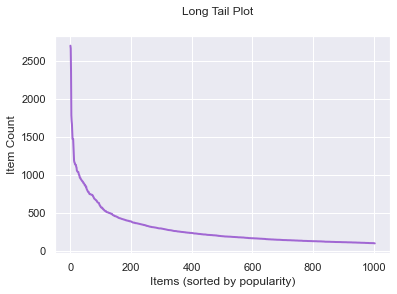

In [8]:
# the long tail plot shows the distribution of item counts
long_tail_plot(df_pivot.to_numpy())

<font color='red'> **Question 2**
- **What does the above plot say about the distribution of artists download numbers?**
<font > 

If we are interested in users' fairness instead, we may want to compare how often the same artists are presented to different groups of users. Here, we will focus on the comparison between male and female users. Specifically, we calculate the proportion of male users (out of all male users) who have downloaded each artist. We then compare this value to the corresponding proportion of female users.

The holisticai function `exposure_diff_plot` displays the difference in exposure for each item, while `exposure_ratio_plot` measures the ratio in exposure.

<AxesSubplot:xlabel='Items (sorted by exposure difference)', ylabel='$Exposure_a - Exposure_b$'>

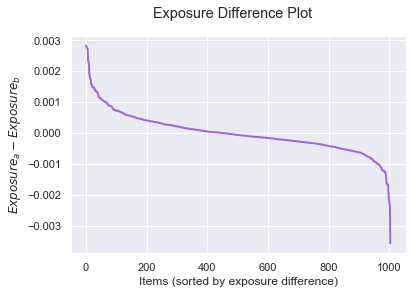

In [9]:
# sorted exposure differences
group_a = p_attr=='f'
group_b = p_attr=='m'
exposure_diff_plot(group_a, group_b, df_pivot.to_numpy())

The differences in exposures seem to be overall quite small. However, since the number of items is quite large, the exposures are small to start with. In these cases, the exposure ratio may be a more informative choice.

<AxesSubplot:xlabel='Items (sorted by exposure ratio)', ylabel='$Exposure_a/Exposure_b$'>

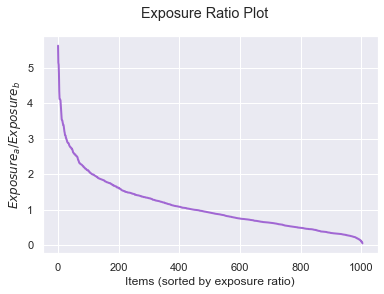

In [10]:
# sorted exposure ratios
exposure_ratio_plot(group_a, group_b, df_pivot.to_numpy())

<AxesSubplot:xlabel='Items (sorted by exposure ratio)', ylabel='$Exposure_a/Exposure_b$'>

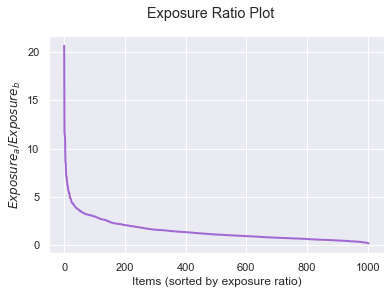

In [11]:
exposure_ratio_plot(group_b, group_a, df_pivot.to_numpy())

<font color='red'> **Question 3**
- **What are the maximum / minimum ratios in exposure to a given artist between male and female groups?**
<font > 

### 2 - Pre-processing the data and training the model

There are many ways to recommend artists to users. We will use item based collaborative filtering since it is the simplest and most intuitive approach. For each artist, we work out a list of most similar artists. Then we recommend artists to users by looking at which artists they like, and choosing the most similar ones.

In [12]:
# Helper dictionnaries
index_to_artist = dict(zip(range(len(df_pivot.columns)),df_pivot.columns))
artist_to_index = dict(zip(df_pivot.columns,range(len(df_pivot.columns))))
user_gender_dict = dict(zip(df_pivot.index, p_attr))
data_matrix = df_pivot.fillna(0).to_numpy()
data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Below we compute the cosine similarity matrix between artists, which is a matrix of shape (num_artists, num_artists).

In [13]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity between items matrix
cosine_sim = linear_kernel(data_matrix.T, data_matrix.T)

cosine_sim.shape

(1004, 1004)

In [14]:
# Helper functions for display
def display_items(arr):
    return [index_to_artist[x] for x in arr]

# Items liked by a given user
def items_liked_by_user(data_matrix, u):
    return np.nonzero(data_matrix[u])[0]

display_items(items_liked_by_user(data_matrix, 9))

['mogwai',
 'my bloody valentine',
 'sonic youth',
 'stereolab',
 'the fall',
 'the kinks',
 'the radio dept.',
 'the velvet underground']

So user 9 happens to be a fan of Mogwai, nice.

<font color='red'>  **Task 2**
- **Try to find your favorite artist within the artist list, and display the 5 artists that are most similar to them using `items_similar_to_item` function**
<font >

In [15]:
def items_similar_to_item(similarity_matrix, i, k):
    arr = similarity_matrix[i]
    arr[i] = 0
    return np.argsort(arr)[-k:]

In [16]:
# TODO

Ok so we want to train a model, we will take a simple approach. For each user we look at their liked items, sum their similarity scores and choose the top matches overall.

In [17]:
def recommended_items(data_matrix, similarity_matrix, u, k):
    liked = items_liked_by_user(data_matrix, u)
    arr = np.sum(similarity_matrix[liked,:], axis=0)
    arr[liked] = 0
    return np.argsort(arr)[-k:]
    
# items recommended to user 9, the mogwai fan
display_items(recommended_items(data_matrix, cosine_sim, 9, 10))

['pink floyd',
 'the cure',
 'the rolling stones',
 'joy division',
 'the smiths',
 'bob dylan',
 'pixies',
 'david bowie',
 'the beatles',
 'radiohead']

Let's look at some examples to see if the recommendations make sense.

In [18]:
# Items similar to 2 Pac
display_items(items_similar_to_item(cosine_sim, artist_to_index['2pac'], 10))

['t.i.',
 'the game',
 'dr. dre',
 'notorious b.i.g.',
 '50 cent',
 'jay-z',
 'snoop dogg',
 'nas',
 'eminem',
 'kanye west']

In [19]:
# Items similar to 2 Pac
display_items(items_similar_to_item(cosine_sim, artist_to_index['the beatles'], 10))

['nirvana',
 'queen',
 'the rolling stones',
 'david bowie',
 'led zeppelin',
 'red hot chili peppers',
 'bob dylan',
 'pink floyd',
 'coldplay',
 'radiohead']

In [20]:
# Items similar to 2 Pac
display_items(items_similar_to_item(cosine_sim, artist_to_index['madonna'], 10))

['u2',
 'nelly furtado',
 'amy winehouse',
 'depeche mode',
 'michael jackson',
 'kylie minogue',
 'the beatles',
 'rihanna',
 'britney spears',
 'coldplay']

These all make sense to a human evaluator

<font color='red'>  **Task 3**
- **Create a pandas DataFrame displaying top 10 recommendations for each of the 15K users**
<font >

In [21]:
# TODO

### 3 - Measuring bias
We will now show how we can calculate various metrics of fairness for recommender systems. In this example, we will cover both metrics for item fairness and for user fairness (equality of outcome).

To compute bias we will need the recommendations in an interaction format, this is done in the next cell

In [22]:
def explode(arr, num_items):
    out = np.zeros(num_items)
    out[arr] = 1
    return out

new_recs = [explode(recommended_items(data_matrix, cosine_sim, u, 10), len(df_pivot.columns)) for u in range(df_pivot.shape[0])]
new_df_pivot = pd.DataFrame(new_recs, columns = df_pivot.columns).replace(0, np.nan)
new_df_pivot

artist,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,Edith piaf,...,weezer,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### A - Item Fairness

In [23]:
# Setting up the data
mat = new_df_pivot.to_numpy()
group_a = p_attr=='f'
group_b = p_attr=='m'

<font color='red'>  **Task 4**
- **Create a long tail plot for the recommendation data.**
<font >

In [24]:
# TODO

<font color='red'> **Question 4**
- **Has our recommender model improved the artist fairness compared to the original data?**
<font > 

<font color='red'>  **Task 5**
- **Compute aggregate diversity, gini index and average recommendation popularity using the holisticai library**. Refer to [documentation](https://holisticai.readthedocs.io/en/latest/metrics.html#recommender) if needed.
<font >

In [25]:
from holisticai.bias.metrics import aggregate_diversity
from holisticai.bias.metrics import gini_index
from holisticai.bias.metrics import avg_recommendation_popularity


# TODO

You should get the following results:

| Metric | Value | Reference |
| --- | --- | --- |
| Aggregate Diversity | 0.41 | 1 |
| Gini Index   | 0.96 | 0 |
| Avg Recommendation Pop   | 5716 | - |




<font color='red'> **Question 5**
- **Based on observations, what is your final verdict on the item fairness of our model?**
<font > 

#### B - User fairness

In [26]:
from holisticai.bias.metrics import exposure_l1
exposure_l1(group_a, group_b, mat)

0.11064958985833381

<font color='red'> **Question 6**
- **Based on above metric, what is your final verdict on the user fairness of our model?**
<font > 